# **Algoritma *K-Means***

# **Pengertian K-Means Clustering**

K-Means Clustering adalah metode pengelompokan data (clustering) yang membagi data ke dalam beberapa kelompok (cluster) berdasarkan kemiripan karakteristik. Setiap cluster memiliki satu titik pusat yang disebut centroid, dan data akan dikelompokkan ke dalam cluster yang centroid-nya paling dekat. Tujuan dari metode ini adalah agar data dengan karakteristik serupa berada dalam satu cluster, sementara data yang berbeda karakteristiknya masuk ke cluster yang lain.

# **Manfaat Clustering**

Clustering sangat berguna dalam berbagai analisis dan pengambilan keputusan, seperti segmentasi pasar, strategi pemasaran, hingga pemetaan wilayah.

Digunakan untuk mengenali pola atau objek dalam berbagai bidang, termasuk computer vision dan image processing.

Hasil clustering yang efektif ditandai dengan kesamaan yang tinggi di dalam satu cluster dan perbedaan yang jelas antar cluster. Kesamaan tersebut biasanya diukur secara numerik — semakin mirip dua objek, semakin tinggi nilai kesamaannya. Kualitas pengelompokan sangat bergantung pada metode dan parameter yang digunakan.




## **Inertia (Sum Square error/SSE)**


Dalam algoritma K-Means Clustering, inertia atau Sum of Squared Error (SSE) adalah metrik yang digunakan untuk mengukur seberapa baik data dikelompokkan ke dalam klaster. Inertia dihitung dengan menjumlahkan seluruh jarak kuadrat antara setiap titik data dengan centroid (pusat klaster) tempat titik tersebut berada.

Semakin kecil nilai inertia, maka semakin baik hasil pengelompokan karena menunjukkan bahwa titik-titik data berada lebih dekat dengan centroid-nya masing-masing. Sebaliknya, nilai inertia yang besar menunjukkan bahwa banyak titik data yang berjauhan dari pusat klasternya, yang berarti hasil pengelompokan kurang optimal.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**


Silhouette Analysis adalah salah satu metode evaluasi yang digunakan untuk menilai kualitas hasil clustering, termasuk pada algoritma K-Means. Metrik ini dianggap lebih informatif dibandingkan inertia karena mempertimbangkan dua aspek penting secara bersamaan:

Kepadatan dalam klaster (seberapa dekat sebuah data dengan anggota klasternya sendiri)

Jarak antar klaster (seberapa jauh data tersebut dari klaster lain yang paling dekat)

Silhouette Analysis mengukur seberapa baik suatu titik data cocok berada di klasternya saat ini, dibandingkan jika ia berada di klaster terdekat lainnya. Nilai silhouette berkisar antara -1 hingga 1:

Nilai mendekati 1 menunjukkan bahwa data berada dalam klaster yang tepat.

Nilai mendekati 0 menunjukkan bahwa data berada di batas antara dua klaster.

Nilai mendekati -1 menunjukkan bahwa data kemungkinan berada di klaster yang salah.


Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## **Implementasi dengan menggunakan data Iris**

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.1 MB/s eta 0:00:00


## **Library yang digunakan**

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pengumpulan Data**

In [3]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1c79828e-posgressqlpendata.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_lNd8P_-IyQzpcnKg3Ye",
        database="defaultdb",
        port=14572
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bunga")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-3f95b8aa-mysqll.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_DYTBfDjLFuF2XVSXIqF",
        database="flowers_mysql",
        port=12288
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowermysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          70.0         88.0          40.9         30.0
  3     Iris-setosa           1.7          0.5           4.7          3.2
  4     Iris-setosa           1.1          0.3           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           0.9          1.1           4.6          3.4
  8     Iris-setosa           1.1          1.1           5.0          3.4
  9     Iris-setosa          66.0         56.0           4.4          2.9
 10     Iris-setosa           1.3          1.0           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa          99.0     

## **Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [4]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[ 0.76699705  0.73947144  2.89233744  2.84524513]
 [-0.08522189 -0.08216349 -0.32137083 -0.31613835]]
Akurasi (Adjusted Rand Score): -0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.01604261 -0.06315315  2.88195952  2.73990017]
 [-0.08522189 -0.08216349 -0.32137083 -0.31613835]
 [11.72955227 11.97621574  3.0376284   4.32007451]]
Akurasi (Adjusted Rand Score): -0.002

Hasil K-Means dengan 4 Klaster:
Centroids:
[[ 1.17402716e-02 -6.80924414e-02  2.51236934e+00  2.90159566e+00]
 [-8.52218946e-02 -8.21634933e-02 -3.21370827e-01 -3.16138347e-01]
 [ 1.17295523e+01  1.19762157e+01  3.03762840e+00  4.32007451e+00]
 [-1.17913163e-01 -4.50424314e-02  4.23712349e+00  2.14701672e+00]]
Akurasi (Adjusted Rand Score): -0.003


## **Model Plotting dengan Jumlah Cluster 2, 3 dan 4**

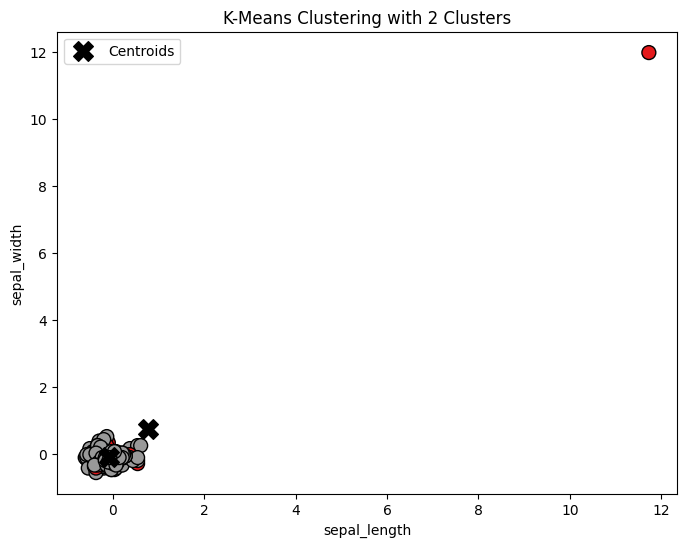

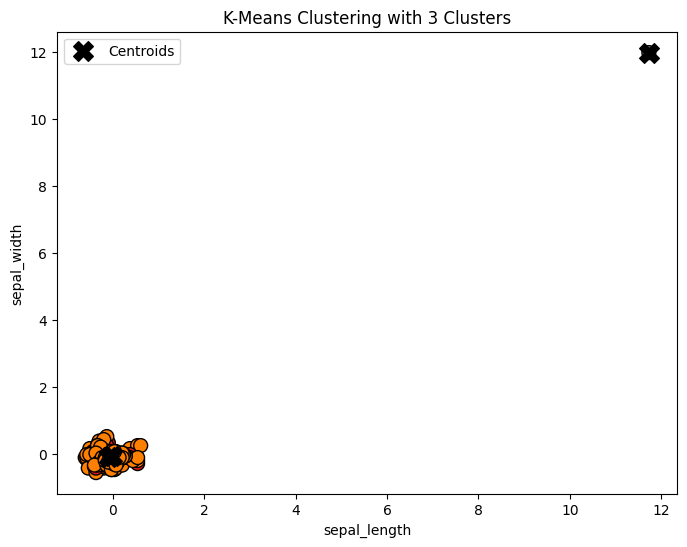

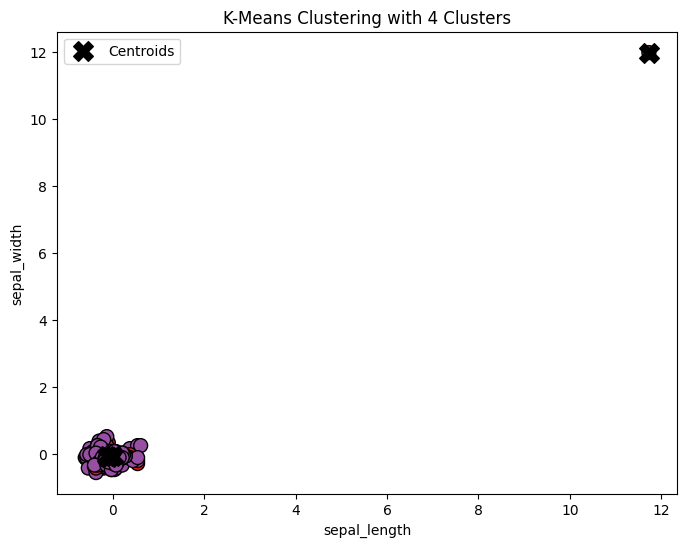

In [5]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


## **Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4**

In [6]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[ 0.76699705  0.73947144  2.89233744  2.84524513]
 [-0.08522189 -0.08216349 -0.32137083 -0.31613835]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [-0.33127984  0.1190194  -0.43921793 -0.37159288]), Klaster: 1, Centroid: [-0.08522189 -0.08216349 -0.32137083 -0.31613835], Jarak kuadrat: 0.118, Inertia sementara: 0.118
Titik data 2 (Fitur: [11.72955227 11.97621574  3.0376284   4.32007451]), Klaster: 0, Centroid: [0.76699705 0.73947144 2.89233744 2.84524513], Jarak kuadrat: 248.638, Inertia sementara: 248.756
Titik data 3 (Fitur: [-0.46603774 -0.01521301 -0.42401307 -0.35556213]), Klaster: 1, Centroid: [-0.08522189 -0.08216349 -0.32137083 -0.31613835], Jarak kuadrat: 0.162, Inertia sementara: 248.918
Titik data 4 (Fitur: [-0.49972721 -0.05995714 -0.4544228  -0.3662493 ]), Klaster: 1, Centroid: [-0.08522189 -0.08216349 -0.32137083 -0.31613835], Jarak kuadrat: 0.193, Inertia sementara: 249.110
Titik 

## **Model Plotting Diagram Elbow Method**

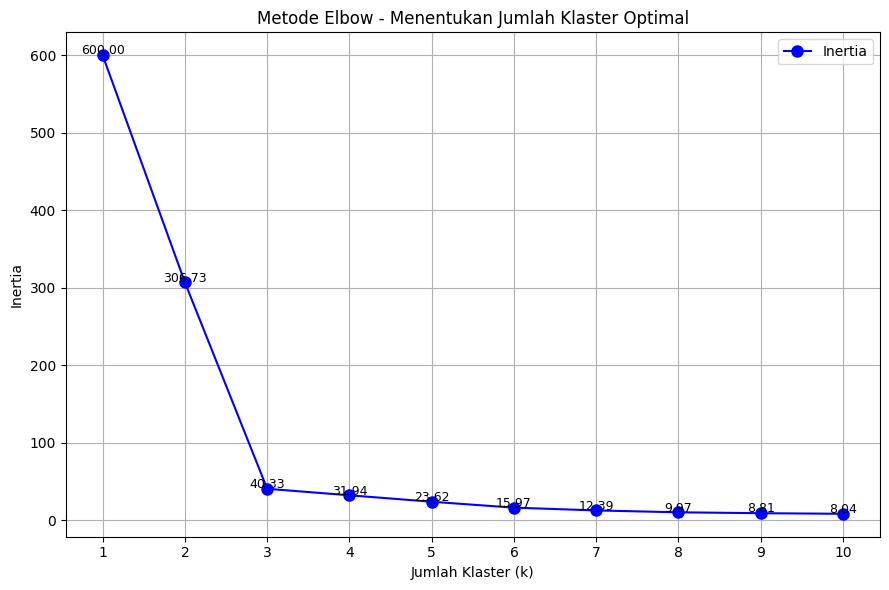

In [7]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## **Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[ 0.76699705  0.73947144  2.89233744  2.84524513]
 [-0.08522189 -0.08216349 -0.32137083 -0.31613835]]
Silhouette Score untuk 2 klaster: 0.862

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-0.01604261 -0.06315315  2.88195952  2.73990017]
 [-0.08522189 -0.08216349 -0.32137083 -0.31613835]
 [11.72955227 11.97621574  3.0376284   4.32007451]]
Silhouette Score untuk 3 klaster: 0.871

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[ 1.17402716e-02 -6.80924414e-02  2.51236934e+00  2.90159566e+00]
 [-8.52218946e-02 -8.21634933e-02 -3.21370827e-01 -3.16138347e-01]
 [ 1.17295523e+01  1.19762157e+01  3.03762840e+00  4.32007451e+00]
 [-1.17913163e-01 -4.50424314e-02  4.23712349e+00  2.14701672e+00]]
Silhouette Score untuk 4 klaster: 0.844

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 3 (dengan score = 0.871)


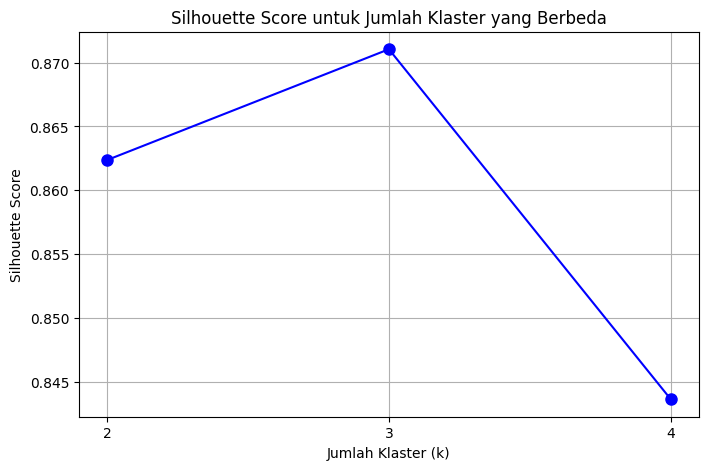

In [8]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()